
Initial Distances:
           Cluster 1  Cluster 2  Cluster 3  Cluster 4  Cluster 5
Cluster 1   0.000000   4.000000  11.704700  20.000000  21.540659
Cluster 2   4.000000   0.000000   8.062258  16.000000  17.888544
Cluster 3  11.704700   8.062258   0.000000   9.848858   9.848858
Cluster 4  20.000000  16.000000   9.848858   0.000000   8.000000
Cluster 5  21.540659  17.888544   9.848858   8.000000   0.000000

Iteration 1
Merged Clusters: [[1, 2], [3], [4], [5]]
Min Distance: 4.0

Iteration 2
Merged Clusters: [[1, 2], [3], [4, 5]]
Min Distance: 8.0

Iteration 3
Merged Clusters: [[1, 2], [3, 4, 5]]
Min Distance: 9.848857801796104

Iteration 4
Merged Clusters: [[1, 2, 3, 4, 5]]
Min Distance: 21.540659228538015


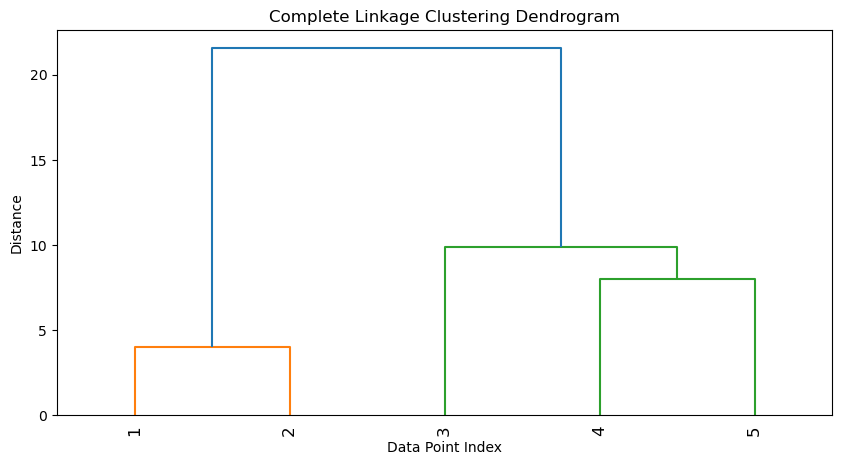

In [10]:
import numpy as np
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

def find_closest_clusters(distances):
    min_distance = np.inf
    closest_i, closest_j = -1, -1
    size = len(distances)
    for i in range(size):
        for j in range(i + 1, size):
            if distances[i][j] < min_distance:
                min_distance = distances[i][j]
                closest_i, closest_j = i, j
    return closest_i, closest_j

def complete_linkage_clustering(data):
    num_points = len(data)
    clusters = [[i] for i in range(1, num_points+1)]

    # Compute initial pairwise distances
    distances = np.zeros((num_points, num_points))
    for i in range(num_points):
        for j in range(i + 1, num_points):
            distances[i][j] = np.linalg.norm(data[i] - data[j])
            distances[j][i] = distances[i][j]

    print("\nInitial Distances:")
    print(pd.DataFrame(distances, index=[f"Cluster {i+1}" for i in range(num_points)],
                      columns=[f"Cluster {i+1}" for i in range(num_points)]))

    iteration = 1
    while num_points > 1:
        # Find the closest clusters
        i, j = find_closest_clusters(distances)

        # Merge the clusters
        clusters[i].extend(clusters[j])
        del clusters[j]

        print(f"\nIteration {iteration}")
        print("Merged Clusters:", clusters)
        print("Min Distance:", distances[i][j])

        # Update pairwise distances
        for k in range(num_points):
            if k != i:
                distances[i][k] = max(distances[i][k], distances[j][k])
                distances[k][i] = distances[i][k]

        # Remove the row and column corresponding to the merged cluster
        distances = np.delete(distances, j, axis=0)
        distances = np.delete(distances, j, axis=1)

        num_points -= 1
        iteration += 1

    return clusters

# Example usage with provided X and Y values
X = [4, 8, 15, 24, 24]
Y = [4, 4, 8, 4, 12]
data = np.column_stack((X, Y))

clusters = complete_linkage_clustering(data)

# Add 1 to each data point index in the clusters
clusters = [[i + 1 for i in cluster] for cluster in clusters]

dist_matrix = data
linkage_matrix = linkage(dist_matrix, method='complete')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=[str(x) for x in range(1, len(data)+1)], leaf_rotation=90)
plt.title('Complete Linkage Clustering Dendrogram')
plt.xlabel('Data Point Index')
plt.ylabel('Distance')
plt.show()
